##    **$$Walmart-Case-study$$**
##Problem Statement
Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.

Business Problem
The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

Dataset
The company collected the transactional data of customers who purchased products from the Walmart Stores during Black Friday. The dataset has the following features:
Dataset link:

 Walmart_data.csv

User_ID:	User ID

Product_ID:	Product ID

Gender:	Sex of User

Age:	Age in bins

Occupation:	Occupation(Masked)

City_Category:	Category of the City (A,B,C)

StayInCurrentCityYears:	Number of years stay in current city

Marital_Status:	Marital Status

ProductCategory:	Product Category (Masked)

Purchase:	Purchase Amount


Problems-

1.	Import the dataset and do usual data analysis steps like checking the structure & characteristics of the dataset.
2.	Detect Null values & Outliers (using boxplot, “describe” method by checking the difference between mean and median, isnull etc.)
3.	Do some data exploration steps like:
o	Tracking the amount spent per transaction of all the 50 million female customers, and all the 50 million male customers, calculate the average, and conclude the results.
o	Inference after computing the average female and male expenses.
o	Use the sample average to find out an interval within which the population average will lie.
o	  Using the sample of female customers you will calculate the interval within which the average spending of 50 million male and female customers may lie.
4.	Use the Central limit theorem to compute the interval. Change the sample size to observe the distribution of the mean of the expenses by female and male customers.
o	The interval that you calculated is called Confidence Interval. The width of the interval is mostly decided by the business: Typically 90%, 95%, or 99%. Play around with the width parameter and report the observations.
5.	Conclude the results and check if the confidence intervals of average male and female spends are overlapping or not overlapping. How can Walmart leverage this conclusion to make changes or improvements?
6.	Perform the same activity for Married vs Unmarried and Age
o	For Age, you can try bins based on life stages: 0-17, 18-25, 26-35, 36-50, 51+ years.
7.	Give recommendations and action items to Walmart.


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm

In [ ]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094
To: /content/walmart_data.csv?1641285094
100% 23.0M/23.0M [00:00<00:00, 100MB/s]


In [ ]:
data = pd.read_csv("walmart_data.csv?1641285094")

In [ ]:
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [ ]:
data.shape

(550068, 10)

From above analysis there are 550068 rows and 10 columns in Data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


From above analysis it is clear there is no null value available in the given dataset as all non-Null value are equal and same

#Treatment of Data type

## The column 'Stay_IN_Current_City_Years' need to be treated and its data type need to be changed

In [ ]:
data['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

**from its unique value and data type we can see it is string data type also it include one non-number value i.e 4+ which we can assume 4 for our reference further**

In [ ]:
data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].str.split("+").str[0]
data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].astype('int')


from above process we change data type and  aslo ***converted the string notation into numerical integer format***

In [ ]:
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [ ]:
data.describe().drop('User_ID',axis =1)

,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,8.076707,1.858418,0.409653,5.404270,9263.968713
std,6.522660,1.289443,0.491770,3.936211,5023.065394
min,0.000000,0.000000,0.000000,1.000000,12.000000
25%,2.000000,1.000000,0.000000,1.000000,5823.000000
50%,7.000000,2.000000,0.000000,5.000000,8047.000000
75%,14.000000,3.000000,1.000000,8.000000,12054.000000
max,20.000000,4.000000,1.000000,20.000000,23961.000000


Importing visualisation and Stats library for our further calculation

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

#Checking Correlation among different factor in data and making heatplot for visualisation

**Correlation**

In [ ]:
data.corr()

<ipython-input-90-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,User_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
User_ID,1.000000,-0.023971,-0.030737,0.020443,0.003825,0.004716
Occupation,-0.023971,1.000000,0.030005,0.024280,-0.007618,0.020833
Stay_In_Current_City_Years,-0.030737,0.030005,1.000000,-0.012819,-0.004213,0.005422
Marital_Status,0.020443,0.024280,-0.012819,1.000000,0.019888,-0.000463
Product_Category,0.003825,-0.007618,-0.004213,0.019888,1.000000,-0.343703
Purchase,0.004716,0.020833,0.005422,-0.000463,-0.343703,1.000000


**Heatmap**

<ipython-input-92-4744123c13fc>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=data.corr(),annot=True,cmap='Blues')


<Axes: >

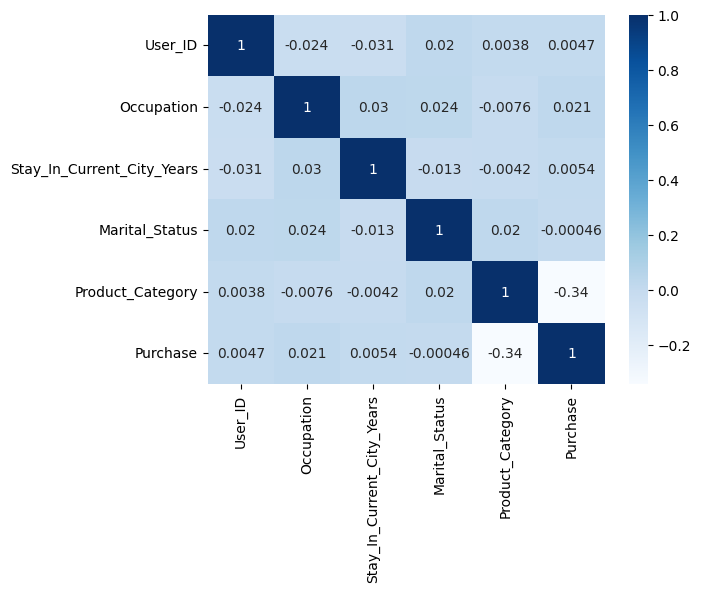

In [ ]:
sns.heatmap(data=data.corr(),annot=True,cmap='Blues')

**Insights**:

From the above graph it is clear that
columns are **not strongly correlated** with each other
even there are some variables which are negatively correlated
so it is better to analyse the variables
 individually for better consideration

##Checking and Treating outlier

<Axes: xlabel='Gender', ylabel='Purchase'>

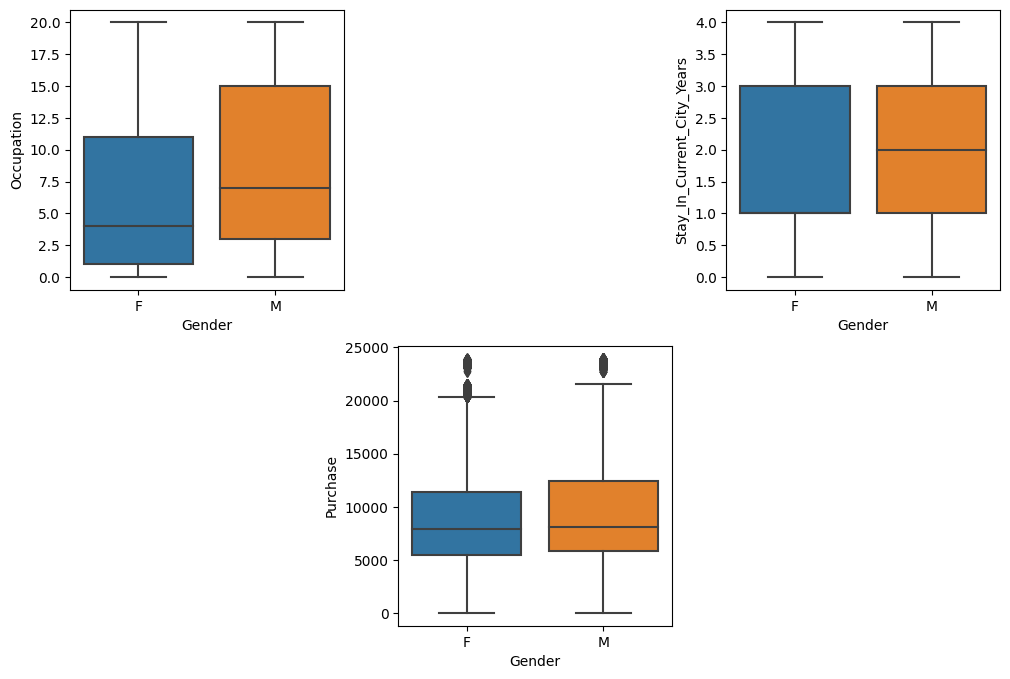

In [ ]:
plt.figure(figsize=(12,8))
plt.subplot(2,3,1)
sns.boxplot(data=data,x='Gender',y='Occupation')
plt.subplot(2,3,3)
sns.boxplot(data=data,x='Gender',y='Stay_In_Current_City_Years')
plt.subplot(2,3,5)
sns.boxplot(data=data,x='Gender',y='Purchase')


**Insights**:  from above Box plot  it is clear that only **Purchase** have outlier in it for both male and female

##Treating Outlier - Purchase column

#1.Male (Outlier)

In [ ]:
data_m = data.loc[data['Gender']== 'M']
data_m

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
4,1000002,P00285442,M,55+,16,C,4,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
...,...,...,...,...,...,...,...,...,...,...
550057,1006023,P00370853,M,26-35,0,C,2,1,19,61
550058,1006024,P00372445,M,26-35,12,A,0,1,20,121
550060,1006026,P00371644,M,36-45,6,C,1,1,20,494
550062,1006032,P00372445,M,46-50,7,A,3,0,20,473


In [ ]:
m_p_25 = np.percentile(data_m['Purchase'],25)
## it is 25% percentile value of purchase for male similary for 50 percentile and 75 percentile value
m_p_50 = np.percentile(data_m['Purchase'],50)
m_p_75 = np.percentile(data_m['Purchase'],75)
m_p_25,m_p_50,m_p_75


(5863.0, 8098.0, 12454.0)

so we got 25,50,75 percentile value of purchase made by male further we will calculate IQR

#IQR

In [ ]:
IQR = m_p_75- m_p_25 # Q3- Q1
IQR

6591.0

<Axes: xlabel='Gender', ylabel='Purchase'>

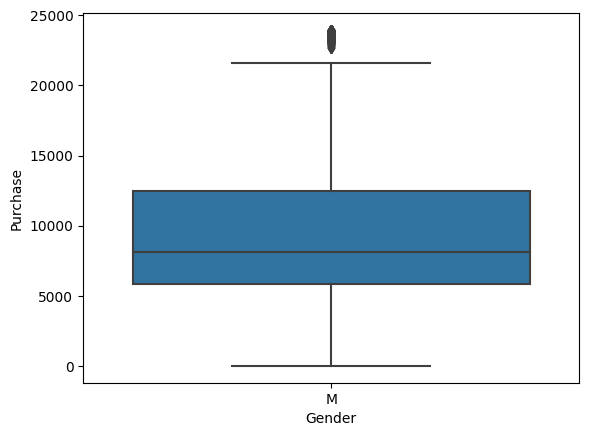

In [ ]:
sns.boxplot(y='Purchase',data=data_m ,x='Gender')

Upper_Whisker = Q3 + 1.5 X IQR  ||
Lower_Whisker = Q1 - 1.5 X IQR

In [ ]:
upper_line = m_p_75 + 1.5 * IQR
lower_line = max(m_p_25 - 1.5 * IQR,0)
lower_line,upper_line

(0, 22340.5)

Checking how many outlier are there For purchase by Male

---



In [ ]:
data_outlier_Male = data_m[data_m['Purchase'] > upper_line]
data_outlier_Male['Purchase'].count()

1812

##There are **1812** **outliers** in purchase for ***male buyers***





# 2.Female (Outlier in Purchase)

In [ ]:
data_f = data.loc[data['Gender']== 'F']
f_p_25 = np.percentile(data_f['Purchase'],25)
## it is 25% percentile value of purchase for male similary for 50 percentile and 75 percentile value
f_p_50 = np.percentile(data_f['Purchase'],50)
f_p_75 = np.percentile(data_f['Purchase'],75)
f_p_25,f_p_50,f_p_75


(5433.0, 7914.0, 11400.0)

In [ ]:
IQR = f_p_75- f_p_25
IQR

5967.0

<Axes: xlabel='Gender', ylabel='Purchase'>

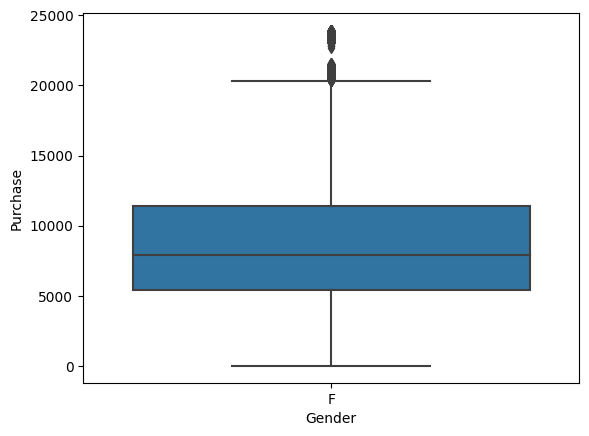

In [ ]:
sns.boxplot(y='Purchase',data=data_f,x='Gender')

In [ ]:
upper_line = f_p_75 + 1.5 * IQR
lower_line = max(f_p_25 - 1.5 * IQR,0)
lower_line,upper_line

(0, 20350.5)

Checking how many outlier are there For purchase by Male

In [ ]:
data_outlier_Female = data_f[data_f['Purchase'] > upper_line]
data_outlier_Female['Purchase'].count()

2065

There are **2065 outliers** in purchase for ***Female***

#Q-3 Data exploration:

1.Tracking the amount spent per transaction of all the 50 million female customers, and all the 50 million male customers, calculate the average, and conclude the results.

# **Male**

In [ ]:
data_m_t = data_m.groupby('User_ID')[['User_ID','Purchase']].agg({'Purchase':'mean'})
data_m_t = data_m_t.reset_index()
data_m_t

,User_ID,Purchase
0,1000002,10525.610390
1,1000003,11780.517241
2,1000004,14747.714286
3,1000005,7745.292453
4,1000007,13804.000000
...,...,...
4220,1006030,12497.644068
4221,1006032,9404.745455
4222,1006033,13940.083333
4223,1006034,16423.833333


Text(0.5, 1.0, 'Male Purchase')

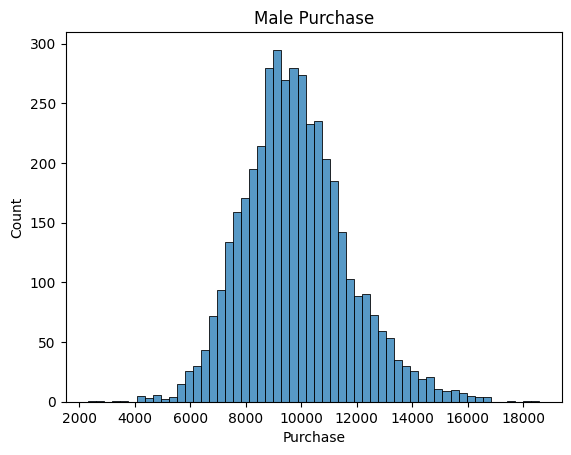

In [ ]:
sns.histplot(x=data_m_t['Purchase'],data=data_m_t)
plt.title('Male Purchase')

In [ ]:
np.mean(data_m_t['Purchase'])

9806.867524226629

In [ ]:
data_m_t['Purchase'].describe()

count     4225.000000
mean      9806.867524
std       1906.396106
min       2318.733333
25%       8552.733333
50%       9681.895604
75%      10933.852459
max      18577.893617
Name: Purchase, dtype: float64

**Insights:**  
1. The graph clearly shows majority of transaction amount lies between 8000 -12000  and the calculated mean is 9806.865
2. Mean != Median {9806 !=  9681 ) from above analysis so it can be concluded that the curve doesn't follow gaussian distribution property

*Gaussian distribution property:*

1. In a normal distribution, the mean, median and mode are equal.(i.e., Mean = Median= Mode).
2. The total area under the curve should be equal to 1.
3. The normally distributed curve should be symmetric at the centre ,  etc.



# **Female**

In [ ]:
data_f_t = data_f.groupby('User_ID')[['User_ID','Purchase']].agg({'Purchase':'mean'})
data_f_t = data_f_t.reset_index()
data_f_t

,User_ID,Purchase
0,1000001,9545.514286
1,1000006,8083.617021
2,1000010,9728.744395
3,1000011,7957.471429
4,1000016,6840.454545
...,...,...
1661,1006035,6293.717105
1662,1006036,8007.894942
1663,1006037,9176.540984
1664,1006038,7502.833333


Text(0.5, 1.0, 'Female Purchase')

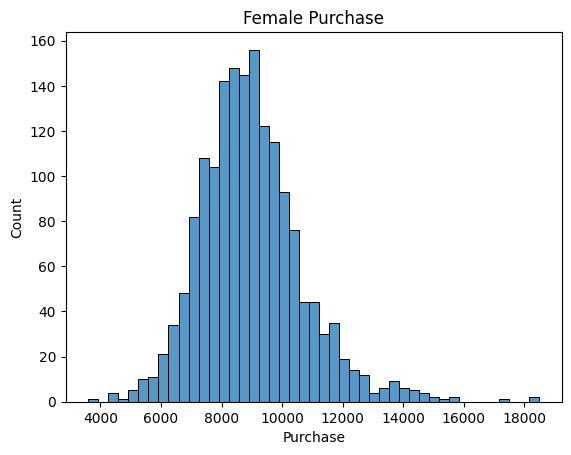

In [ ]:
sns.histplot(x=data_f_t['Purchase'],data=data_f_t)
plt.title('Female Purchase')

Average Female

In [ ]:
np.mean(data_f_t['Purchase'])

8965.19846393646

In [ ]:
data_f_t['Purchase'].describe()

count     1666.000000
mean      8965.198464
std       1705.615508
min       3599.733333
25%       7857.252965
50%       8818.059311
75%       9859.887613
max      18490.166667
Name: Purchase, dtype: float64

**Insights:**

1. The graph clearly shows majority of transaction amount For female lies between 7000 -10000  and the calculated mean is 8965.19
2. though Mean ~ Median ( 8965 ~ 8818 )  but there are factor which doesnt make data distribution eligible for normal distribution from above analysis so it can be concluded that the curve doesn't follow gaussian distribution property

#Q) - 1.	Are women spending more money per transaction than men? Why or Why not?

to attempt this question we will do Hypothesis testing ttest-independent as purchase behaviour of male and female are entirely different aand for that we would use scipy.stats library , we will do as follows


In [ ]:
data_f_t['Purchase'].sum()

14936020.640918143

In [ ]:
data_m_t['Purchase'].sum()

41434015.28985751

In [ ]:
female_mean = np.mean(data_f_t['Purchase'])
male_mean = np.mean(data_m_t['Purchase'])
print("female_mean",female_mean)
print("male_mean",male_mean)

female_mean 8965.19846393646
male_mean 9806.867524226629


$$Null$$ $$Hypothesis$$ **Ho: Women mean spend < men mean spend**
$$Alternative$$ $$ Hypothesis$$
**Ha : Women mean spend > men mean spend**


In [ ]:
from scipy.stats import ttest_ind
Female_data = data_f_t['Purchase']
Male_data = data_m_t['Purchase']

In [ ]:
t_stats,p_value = ttest_ind(Female_data,Male_data,alternative='greater')
print("t_stats:",t_stats)
print("p_value:",p_value)



t_stats: -15.710670799370236
p_value: 1.0


In [ ]:
alpha = 0.05 # Since checking for 95 % confidence level
if p_value < alpha:
  print(" Reject the Null hypothesis ")
else:
  print(" Fail to reject the Null Hypothesis")

 Fail to reject the Null Hypothesis


from Above results we can say that The null hypothesis Failed to be rejected : that women spend more than men is rejected as **pvalue is greater than alpha**

**Insights: Women spends less than man**

##Q-3- C) Use the sample average to find out an interval within which the population average will lie. Using the sample of female customers you will calculate the interval within which the average spending of 50 million male and female customers may lie.

##Male:

In [ ]:
data_m_t['User_ID'].shape[0]

4225

In [ ]:
data_m_t['Purchase'].mean()

9806.867524226629

In [ ]:
data_m_t['Purchase'].std()

1906.3961057186173

##Taking a 100 sample from male data purchase set and experimenting it for 1000 times

In [ ]:
sample_100_m = [np.mean(data_m_t['Purchase'].sample(100)) for i in range (1000)]
np.mean(sample_100_m)

9817.997125222866

In [ ]:
np.std(sample_100_m)

187.10172442129078

<Axes: ylabel='Count'>

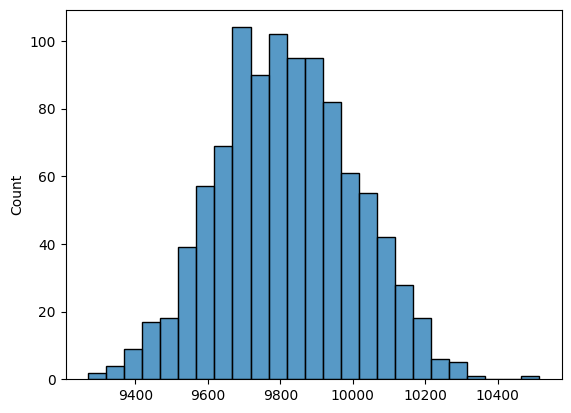

In [ ]:
sns.histplot(sample_100_m)

<Axes: xlabel='Purchase', ylabel='Count'>

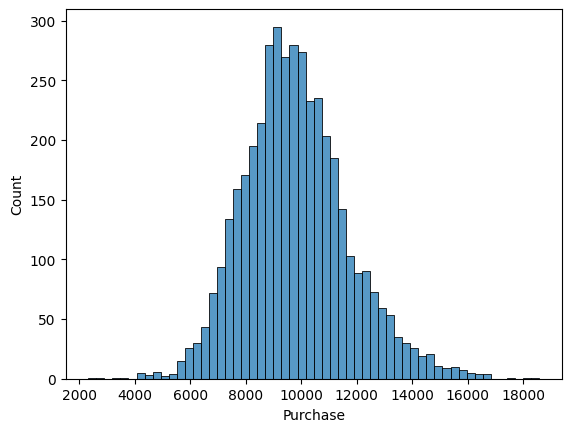

In [ ]:
sns.histplot(data_m_t['Purchase'])

##Inferences
Male

**100 Sample**    

mean : 9810.24275323138

standard deviation : 190.98121429369385  

**Population - (M)**

mean: 9806.867524226629

standard deviation : 1906.3961057186173

mean of sample mean  **~** Population mean

sample distribution follows normal distribution

on taking Samples for  1000 times when calculated  mean  we get sample mean = poplation mean

## finding range where Population average lies from sample average by checking with 95% confidence interval

## Taking 100 Male sample to fetch out population mean interval

In [ ]:
data_100_m = np.mean(data_m_t['Purchase'].sample(100))
data_100_m

9959.531350702759

In [ ]:
range_m_95 = norm.interval(confidence=0.95, loc= data_100_m, scale = (data['Purchase'].std()/np.sqrt(100)))
range_m_95

(8975.028624314975, 10944.034077090542)

In [ ]:

range_m_95

(9035.230853753315, 11004.236306528883)

**Insights:**
1. From sample average of Male with 95% confidence interval The population average will lie between the range as calculated in just above process for Male and Femalem buyers
the range is  - range_m_95

# Taking Female sample for calculating Population mean Interval range


In [ ]:
data_100_f = np.mean(data_f_t['Purchase'].sample(100))
data_100_f

9152.372808851947

In [ ]:
range_f_95 = norm.interval(confidence=0.95, loc= data_100_f, scale = (data['Purchase'].std()/np.sqrt(100)))
range_f_95

(8167.870082464163, 10136.875535239731)

**Insights:**

From sample average  with 95% confidence interval The population average will lie between the range as calculated in just above process for Female buyers
the range is
**range_f_95**

# 4.	Use the Central limit theorem to compute the interval. Change the sample size to observe the distribution of the mean of the expenses by female and male customers.

-	The interval that you calculated is called Confidence Interval. The width of the interval is mostly decided by the business: Typically 90%, 95%, or 99%. Play around with the width parameter and report the observations.

##Male


## Confidence Interval - 90%
Taking Sample size = 10

In [ ]:
data_10_m = np.mean(data_m_t['Purchase'].sample(10))
range_m_90 = norm.interval(confidence=0.9, loc= data_10_m, scale = (data_m_t['Purchase'].std()/np.sqrt(10)))
range_m_90


(7743.229874235231, 9726.44759631879)

Sample size = 50

In [ ]:
data_50_m = np.mean(data_m_t['Purchase'].sample(50))
range_m_90 = norm.interval(confidence=0.9, loc= data_50_m, scale = (data_m_t['Purchase'].std()/np.sqrt(50)))
range_m_90

(9739.72842843745, 10626.650356589673)

Sample size = 100

In [ ]:
data_100_m = np.mean(data_m_t['Purchase'].sample(100))
range_m_90 = norm.interval(confidence=0.9, loc= data_100_m, scale = (data_m_t['Purchase'].std()/np.sqrt(100)))
range_m_90

(9706.159325251356, 10333.307835030842)

##Confidence Interval = 95%
below i have created a function for easing the process of deriving the interval range with respect to different sample size

Sample size = 10

In [ ]:
def ci_95(sample_size):
  data_n_m = np.mean(data_m_t['Purchase'].sample(sample_size))
  range_m_95 = norm.interval(confidence=0.95, loc= data_n_m, scale = (data_m_t['Purchase'].std()/np.sqrt(sample_size)))
  return range_m_95
ci_95(10)

(8929.241297491502, 11292.390969349824)

Sample Size = 50

In [ ]:
ci_95(50)

(9304.362698384848, 10361.195359841153)

Sample Size = 100

In [ ]:
ci_95(100)

(9373.22162196726, 10120.515163462438)

##Confidence Interval = 99%
Using the function we can derive the interval range with respect to different sample size for confidence interval = 99%

Sample Size = 10

In [ ]:
def ci_99(sample_size):
  data_n_m = np.mean(data_m_t['Purchase'].sample(sample_size))
  range_m_99 = norm.interval(confidence=0.99, loc= data_n_m, scale = (data_m_t['Purchase'].std()/np.sqrt(sample_size)))
  return range_m_95
ci_99(10)

(9384.314903059323, 10131.608444554502)

Sample Size = 50

In [ ]:
ci_99(50)

(9384.314903059323, 10131.608444554502)

Sample Size = 100

In [ ]:
ci_99(100)

(9384.314903059323, 10131.608444554502)

#understanding the above process through graph
considering sample size and confidence percentage:  



sample_list = [5,10,50,100,250,500]

confidence_list =[0.9,0.95,0.99]

In [ ]:
def ci(sample_size,confidence_interval):
  data_n_m = np.mean(data_m_t['Purchase'].sample(sample_size))
  range_m_95 = norm.interval(confidence=confidence_interval, loc= data_n_m, scale = (data_m_t['Purchase'].std()/np.sqrt(sample_size)))
  return range_m_95
##Lets assume sample size from list
sample_list = [5,10,50,100,250,500]
confidence_list =[0.9,0.95,0.99]

result = list()
for i in confidence_list:
  for j in sample_list:
    lower_bound,upper_bound = ci(j,i)
    result.append([lower_bound,upper_bound,i*100,j])
df = pd.DataFrame(result)
df.columns = ['Lower_bound','Upper_bound','Confidence_percent','Sample_Size']
df





,Lower_bound,Upper_bound,Confidence_percent,Sample_Size
0,7526.510084,10331.203484,90.0,5
1,9062.417302,11045.635024,90.0,10
2,9464.174922,10351.096850,90.0,50
3,9387.943489,10015.091999,90.0,100
4,9618.387839,10015.031383,90.0,250
5,9779.782886,10060.252226,90.0,500
6,10042.464962,13384.463278,95.0,5
7,8581.715983,10944.865655,95.0,10
8,9636.094808,10692.927469,95.0,50
9,9478.528282,10225.821823,95.0,100


In [ ]:
df['Interval_length'] = df['Upper_bound'] -df['Lower_bound']
df

,Lower_bound,Upper_bound,Confidence_percent,Sample_Size,Interval_length
0,7526.510084,10331.203484,90.0,5,2804.693400
1,9062.417302,11045.635024,90.0,10,1983.217722
2,9464.174922,10351.096850,90.0,50,886.921928
3,9387.943489,10015.091999,90.0,100,627.148510
4,9618.387839,10015.031383,90.0,250,396.643544
5,9779.782886,10060.252226,90.0,500,280.469340
6,10042.464962,13384.463278,95.0,5,3341.998316
7,8581.715983,10944.865655,95.0,10,2363.149672
8,9636.094808,10692.927469,95.0,50,1056.832661
9,9478.528282,10225.821823,95.0,100,747.293541


##90% Confidence

Text(0.5, 1.0, '90% Confidence')

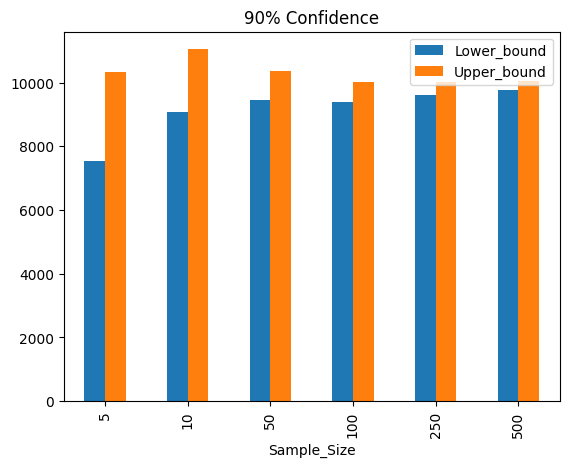

In [ ]:
df[df['Confidence_percent'] == 90.0].plot(x='Sample_Size',y = ['Lower_bound','Upper_bound'],kind= 'bar')
plt.title('90% Confidence')


As sample size increases the the confidence intervals narrow down from graph and we can get better approximation of population mean

#95% confidence

Text(0.5, 1.0, '95% Confidence')

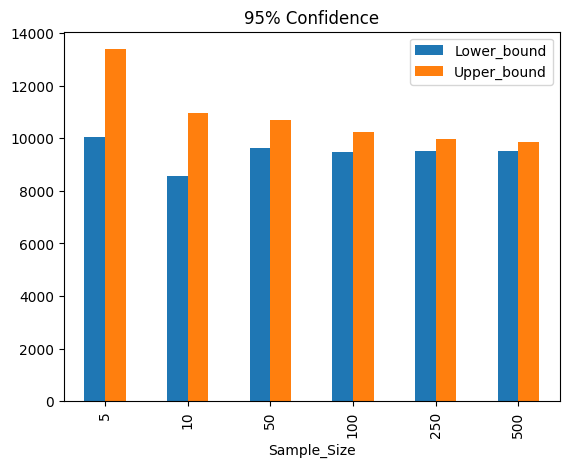

In [ ]:
df[df['Confidence_percent'] == 95.0].plot(x='Sample_Size',y = ['Lower_bound','Upper_bound'],kind= 'bar')
plt.title('95% Confidence')

##99% Confidence

Text(0.5, 1.0, '99% Confidence ')

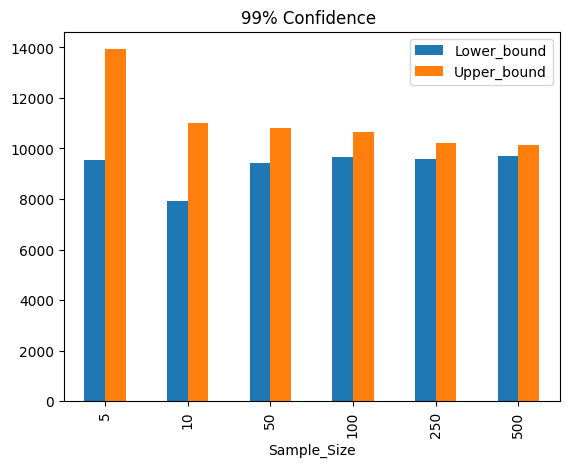

In [ ]:
df[df['Confidence_percent'] == 99.0].plot(x='Sample_Size',y = ['Lower_bound','Upper_bound'],kind= 'bar')
plt.title('99% Confidence ')

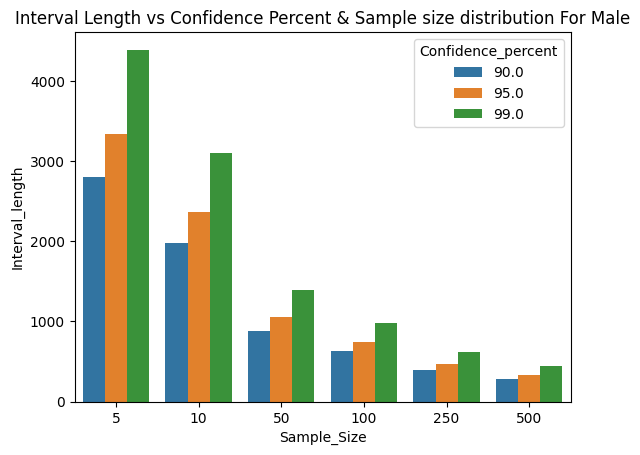

In [ ]:
sns.barplot(x='Sample_Size',y='Interval_length',data=df,hue='Confidence_percent')
plt.title("Interval Length vs Confidence Percent & Sample size distribution For Male")
plt.show()

**Insights:**

1. From the above plot we can infer that **interval length [ Upper_bound- Lower_bound] is very high** when **sample size is less** around 5,10,50 then **it decreases significantly** for all confidence interval 90%,95%,99 %
2. The Interval length Difference between 90 - 95- 99 % confidence **keep on decreasing** as the sample size increases and it **is least for sample size 250 and 500**

#**Similarly for Females**

we can understand it through graphs

In [ ]:
def ci(sample_size,confidence_interval):
  data_n_f = np.mean(data_f_t['Purchase'].sample(sample_size))
  range_f = norm.interval(confidence=confidence_interval, loc= data_n_f, scale = (data_f_t['Purchase'].std()/np.sqrt(sample_size)))
  return range_f
##Lets assume sample size from list
sample_list = [5,10,50,100,250,500]
confidence_list =[0.9,0.95,0.99]

result = list()
for i in confidence_list:
  for j in sample_list:
    lower_bound,upper_bound = ci(j,i)
    result.append([lower_bound,upper_bound,i*100,j])
dm = pd.DataFrame(result)
dm.columns = ['Lower_bound','Upper_bound','Confidence_percent','Sample_Size']
dm

In [ ]:
dm['Interval_length'] = dm['Upper_bound'] -dm['Lower_bound']
dm

,Lower_bound,Upper_bound,Confidence_percent,Sample_Size,Interval_length
0,7860.419993,10369.724613,90.0,5,2509.304620
1,7603.651033,9377.997346,90.0,10,1774.346313
2,8106.645753,8900.157548,90.0,50,793.511794
3,8751.897908,9312.995478,90.0,100,561.097571
4,8685.361802,9040.231064,90.0,250,354.869263
5,8740.091181,8991.021643,90.0,500,250.930462
6,6663.254025,9653.274901,95.0,5,2990.020876
7,8145.002714,10259.266751,95.0,10,2114.264037
8,8341.438816,9286.966437,95.0,50,945.527622
9,8501.212727,9169.801720,95.0,100,668.588993


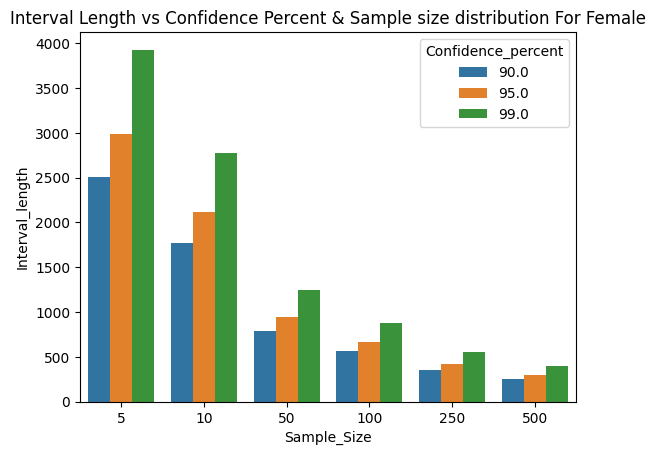

In [ ]:
sns.barplot(x='Sample_Size',y='Interval_length',data=dm,hue='Confidence_percent')
plt.title("Interval Length vs Confidence Percent & Sample size distribution For Female")
plt.show()

**Insights:**

1. From the above plot we can infer that **interval length [ Upper_bound- Lower_bound] is very high** when **sample size is less** around 5,10,50 then **it decreases significantly** close to around 500 and less than 1000 for 100,250 and 500 sample for all confidence interval 90%,95%,99 %
2. The Interval length Difference between 90 - 95- 99 % confidence **keep on decreasing** as the sample size increases and it **is least  for sample size 250 and 500**

##90% Confidence interval

Text(0.5, 1.0, '90% Confidence')

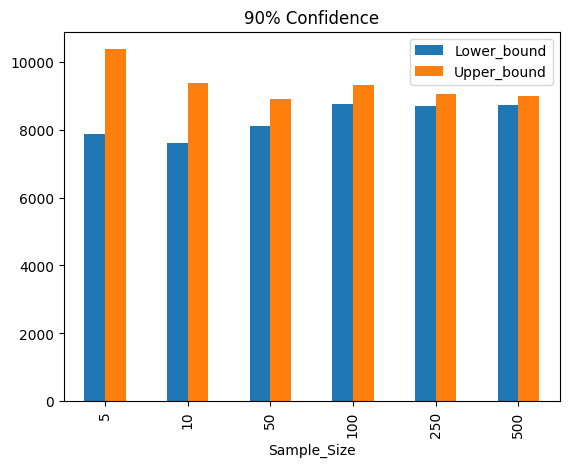

In [ ]:
dm[dm['Confidence_percent'] == 90.0].plot(x='Sample_Size',y = ['Lower_bound','Upper_bound'],kind= 'bar')
plt.title('90% Confidence')

#95% Confidence Interval

Text(0.5, 1.0, '95% Confidence')

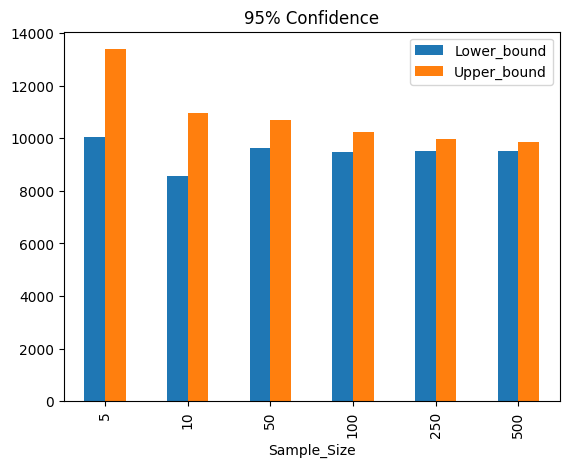

In [ ]:
df[df['Confidence_percent'] == 95.0].plot(x='Sample_Size',y = ['Lower_bound','Upper_bound'],kind= 'bar')
plt.title('95% Confidence')

##99% confidence interval

Text(0.5, 1.0, '99% Confidence')

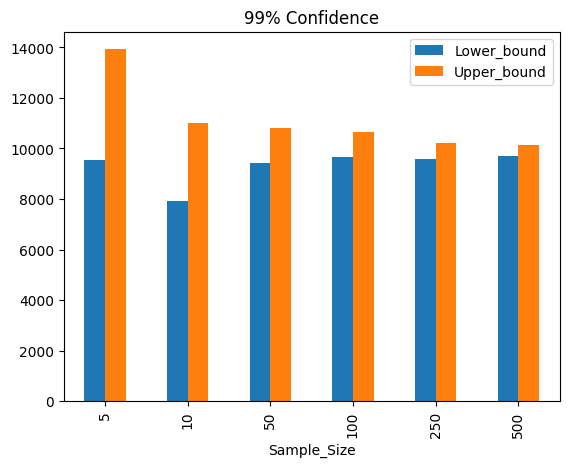

In [ ]:
df[df['Confidence_percent'] == 99.0].plot(x='Sample_Size',y = ['Lower_bound','Upper_bound'],kind= 'bar')
plt.title('99% Confidence')

# Q5.	Conclude the results and check if the confidence intervals of average male and female spends are overlapping or not overlapping. How can Walmart leverage this conclusion to make changes or improvements?

To deal with this question we can use 2sample ttest  hypothesis testing over the  male and female Confidence intervals :

In [ ]:
ci_male = df   #df is data of Male having confidence interval with differnt sample spaces
ci_female = dm #df is data of Femmale having confidence interval with differnt sample spaces

In [ ]:
ci_male

In [ ]:
ci_female

As from Above data the confidence interval are in two columns upper bound and lower bound we have to check seperately for lower and upper bound for overlapping test here we would use: **ttest_2sample with ttest_ind and alternative should be two_sided**

our null hypothesis would be that mean of confidence interval lower and upper bound doesn't overlaps w=and through alternative hypothesis we have to prove that they overlap each other

# Checking Overlapping lower bound {confidence interval) with ttest_ind

$$Null$$ $$Hypothesis$$ **Ho: Male confidence interval mean (lower_bound) !=  Female confidence interval mean(lower_bound)** {not overlap}
$$Alternative$$ $$ Hypothesis$$
**Ha : Male confidence mean(lower_bound) = Female confidence interval mean(lower_bound)** {overlap}

In [ ]:
ci_male_l =ci_male['Lower_bound']
ci_female_l = ci_female['Lower_bound']

In [ ]:
t_stats,p_value = ttest_ind(ci_female_l ,ci_male_l,alternative='two-sided')
print("t_stats:",t_stats)
print("p_value:",p_value)

t_stats: -4.903565116619648
p_value: 2.289890062495615e-05


checking for standard 95% confidence level or alpha = 0.05

In [ ]:
alpha = 0.05 # Since checking for 95 % confidence level
if p_value < alpha:
  print(" Reject the Null hypothesis ")
else:
  print(" Fail to reject the Null Hypothesis")

 Reject the Null hypothesis 


**Insights:** Null hypothesis is rejected it means lower bounds ci of male overlapp with lower bound ci of female

#checking for Upper Bound

$$Null$$ $$Hypothesis$$ **Ho: Male confidence interval mean (upper_bound) !=  Female confidence interval mean(upper_bound)** {not overlap}
$$Alternative$$ $$ Hypothesis$$
**Ha : Male confidence mean(upper_bound) = Female confidence interval mean(upper_bound)** {overlap}

In [ ]:
ci_male_u =ci_male['Upper_bound']
ci_female_u = ci_female['Upper_bound']
t_stats,p_value = ttest_ind(ci_female_u ,ci_male_u,alternative='two-sided')
print("t_stats:",t_stats)
print("p_value:",p_value)

t_stats: -3.688532455641945
p_value: 0.0007828343018336092


In [ ]:
alpha = 0.05 # Since checking for 95 % confidence level
if p_value < alpha:
  print(" Reject the Null hypothesis ")
else:
  print(" Fail to reject the Null Hypothesis")

 Reject the Null hypothesis 


**Insights:** Null hypothesis is rejected it means Upper bounds ci of male overlapp with Upper bound ci of female

**Insights :**
overall we can say that as Mean of male lower bound overlaps with mean of female lower bound of confidence interval and mean male upper bound overlaps with mean of female upper bound of confidence interval from above ttest 2 sample independent hypothesis testing we can conclude

**that Male confidence interval overlaps with female confidence interval**

**Recommendation :**  mean average purchase of male lies in same confidence interval as female purchase mean lies which concludes that population mean of male or female averages could be predicted through either from the sample of male or female

#Q.6	Perform the same activity for Married vs Unmarried and Age



## Male Married

considering 1 - married ||  0  - unmarried in Marital_status

In [ ]:
Male_M = data_m.loc[data_m['Marital_Status'] == 1]
Male_M_t = Male_M.groupby('User_ID')[['User_ID','Purchase']].agg({'Purchase':'mean'}).reset_index()
Male_M_t

,User_ID,Purchase
0,1000004,14747.714286
1,1000005,7745.292453
2,1000007,13804.000000
3,1000008,10345.363636
4,1000013,11898.783333
...,...,...
1750,1006024,13792.833333
1751,1006026,10441.872340
1752,1006027,11530.478261
1753,1006030,12497.644068


Text(0.5, 1.0, 'Number of Married Male Vs purchases')

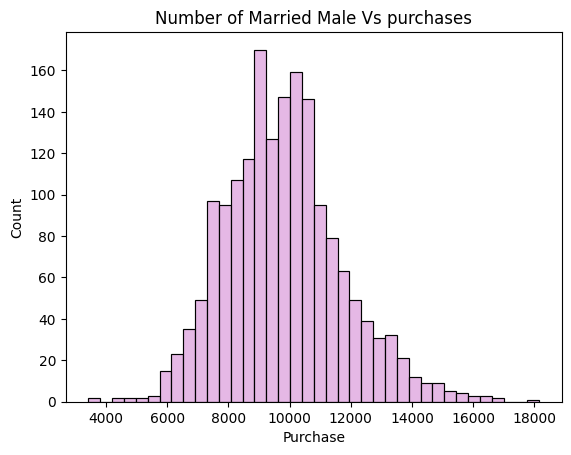

In [ ]:
sns.histplot(x=Male_M_t['Purchase'],data=Male_M_t,color ='Plum')
plt.title('Number of Married Male Vs purchases')

# Now changing the sample size and % confidence to understand the confidence interval where the population means of Married male purchase amount lies

considering sample size and confidence percentage:  

sample_list = [5,10,50,100,250,500]

confidence_list =[0.9,0.95,0.99]

In [ ]:
def ci(sample_size,confidence_interval):
  data_n_mm = np.mean(Male_M_t['Purchase'].sample(sample_size))
  range_mm = norm.interval(confidence=confidence_interval, loc= data_n_mm, scale = (Male_M_t['Purchase'].std()/np.sqrt(sample_size)))
  return range_mm
##Lets assume sample size from list
sample_list = [5,10,50,100,250,500]
confidence_list =[0.9,0.95,0.99]

result = list()
for i in confidence_list:
  for j in sample_list:
    lower_bound,upper_bound = ci(j,i)
    result.append([lower_bound,upper_bound,i*100,j])
dmm = pd.DataFrame(result)
dmm.columns = ['Lower_bound','Upper_bound','Confidence_percent','Sample_Size']
dmm

,Lower_bound,Upper_bound,Confidence_percent,Sample_Size
0,8304.244507,11128.566607,90.0,5
1,8777.545944,10774.643253,90.0,10
2,9381.723787,10274.852855,90.0,50
3,9573.127163,10204.664784,90.0,100
4,9780.294947,10179.714409,90.0,250
5,9684.446488,9966.878698,90.0,500
6,7117.388314,10482.775669,95.0,5
7,8420.806918,10800.495138,95.0,10
8,9263.726695,10327.955621,95.0,50
9,9251.972434,10004.495923,95.0,100


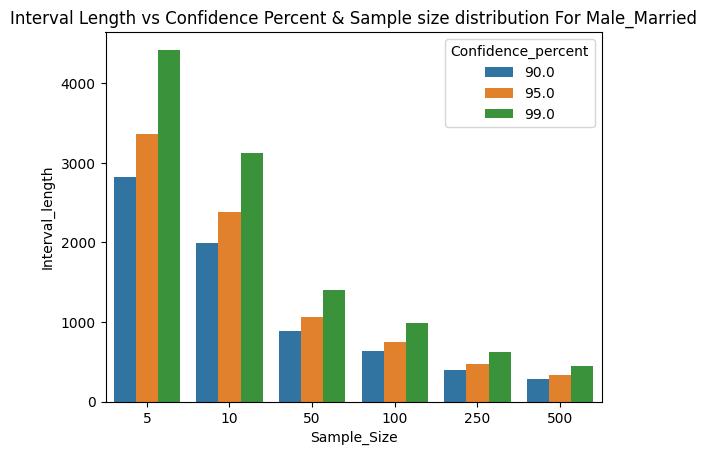

In [ ]:
dmm['Interval_length'] = dmm['Upper_bound'] -dmm['Lower_bound']
dmm
sns.barplot(x='Sample_Size',y='Interval_length',data=dmm,hue='Confidence_percent')
plt.title("Interval Length vs Confidence Percent & Sample size distribution For Male_Married")
plt.show()

##90% Confidence interval { Male Married }

Text(0.5, 1.0, ' Male Married 90% Confidence')

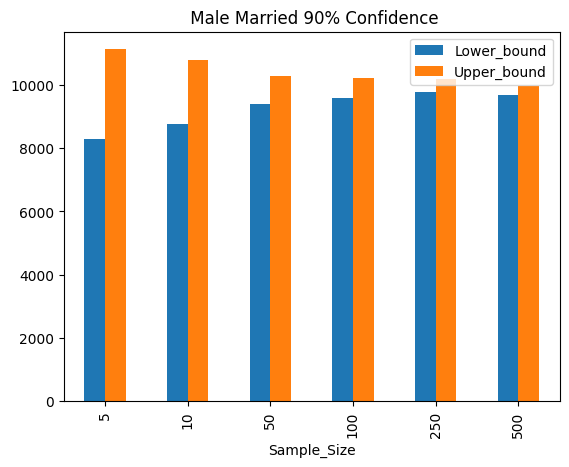

In [ ]:
dmm[dmm['Confidence_percent'] == 90.0].plot(x='Sample_Size',y = ['Lower_bound','Upper_bound'],kind= 'bar')
plt.title(' Male Married 90% Confidence')

##95% Confidence Interval { Male Married }

Text(0.5, 1.0, ' Male Married 95% Confidence')

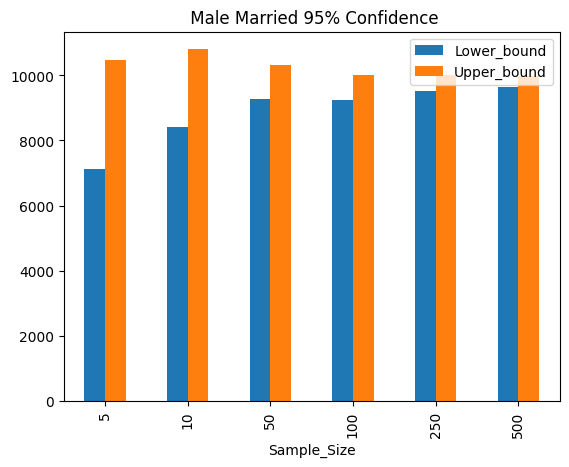

In [ ]:
dmm[dmm['Confidence_percent'] == 95.0].plot(x='Sample_Size',y = ['Lower_bound','Upper_bound'],kind= 'bar')
plt.title(' Male Married 95% Confidence')

##99% Confidence Interval { Male Married }**bold text**

Text(0.5, 1.0, '99% Confidence')

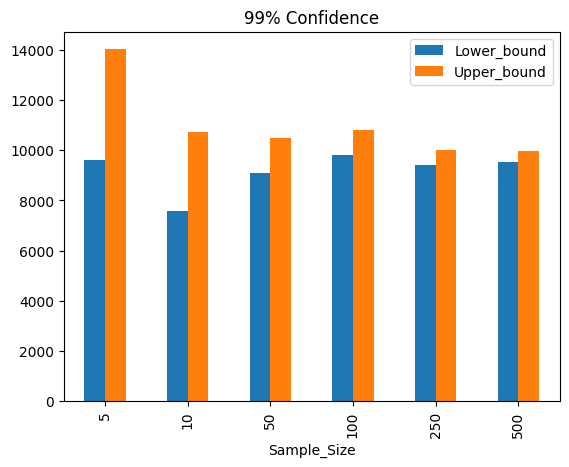

In [ ]:
dmm[dmm['Confidence_percent'] == 99.0].plot(x='Sample_Size',y = ['Lower_bound','Upper_bound'],kind= 'bar')
plt.title('99% Confidence')

#Male unmarried

In [ ]:
Male_u = data_m.loc[data_m['Marital_Status'] == 0]
Male_u_t = Male_u.groupby('User_ID')[['User_ID','Purchase']].agg({'Purchase':'mean'}).reset_index()
Male_u_t

,User_ID,Purchase
0,1000002,10525.610390
1,1000003,11780.517241
2,1000009,10243.086207
3,1000012,10981.909091
4,1000014,9817.615385
...,...,...
2465,1006022,10305.814815
2466,1006028,12963.285714
2467,1006032,9404.745455
2468,1006034,16423.833333


Text(0.5, 1.0, 'Number of Unmarried Male Vs purchases')

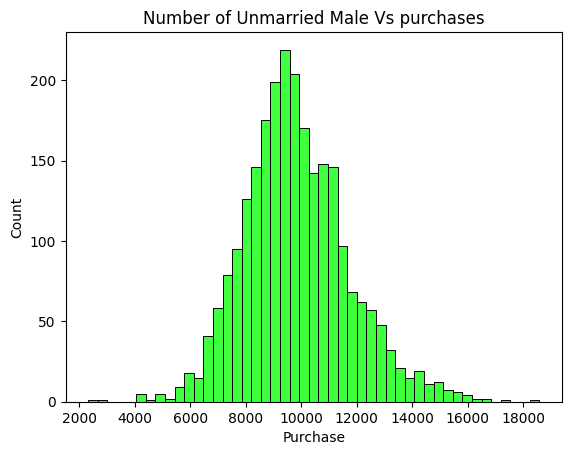

In [ ]:
sns.histplot(x=Male_u_t['Purchase'],data=Male_u_t,color ='lime')
plt.title('Number of Unmarried Male Vs purchases')

# Now changing the sample size and % confidence to understand the confidence interval where the population means of Unmarried male purchase amount lies

considering sample size and confidence percentage:  

sample_list = [5,10,50,100,250,500]

confidence_list =[0.9,0.95,0.99]

In [ ]:
def ci(sample_size,confidence_interval):
  data_n_um = np.mean(Male_u_t['Purchase'].sample(sample_size))
  range_um = norm.interval(confidence=confidence_interval, loc= data_n_um, scale = (Male_u_t['Purchase'].std()/np.sqrt(sample_size)))
  return range_um
##Lets assume sample size from list
sample_list = [5,10,50,100,250,500]
confidence_list =[0.9,0.95,0.99]

result = list()
for i in confidence_list:
  for j in sample_list:
    lower_bound,upper_bound = ci(j,i)
    result.append([lower_bound,upper_bound,i*100,j])
dum = pd.DataFrame(result)
dum.columns = ['Lower_bound','Upper_bound','Confidence_percent','Sample_Size']
dum

,Lower_bound,Upper_bound,Confidence_percent,Sample_Size
0,7833.448883,10624.642088,90.0,5
1,9230.895374,11204.567017,90.0,10
2,9288.845559,10171.498351,90.0,50
3,9391.629880,10015.759654,90.0,100
4,9526.363946,9921.098274,90.0,250
5,9538.100098,9817.219419,90.0,500
6,8455.595605,11781.507447,95.0,5
7,8089.921549,10441.696366,95.0,10
8,9329.640204,10381.385876,95.0,50
9,9791.939291,10535.635787,95.0,100


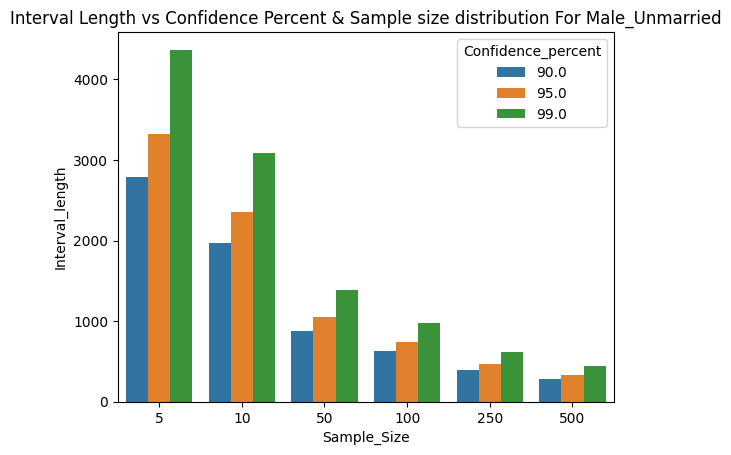

In [ ]:
dum['Interval_length'] = dum['Upper_bound'] -dum['Lower_bound']
dum
sns.barplot(x='Sample_Size',y='Interval_length',data=dum,hue='Confidence_percent')
plt.title("Interval Length vs Confidence Percent & Sample size distribution For Male_Unmarried")
plt.show()

**Insights:** Interval Length keep on decreasing as sample size increases and as confidence percent increases for all sample the interval length increases for sample

In [ ]:
dum

,Lower_bound,Upper_bound,Confidence_percent,Sample_Size,Interval_length
0,7833.448883,10624.642088,90.0,5,2791.193205
1,9230.895374,11204.567017,90.0,10,1973.671643
2,9288.845559,10171.498351,90.0,50,882.652792
3,9391.629880,10015.759654,90.0,100,624.129775
4,9526.363946,9921.098274,90.0,250,394.734329
5,9538.100098,9817.219419,90.0,500,279.119321
6,8455.595605,11781.507447,95.0,5,3325.911842
7,8089.921549,10441.696366,95.0,10,2351.774817
8,9329.640204,10381.385876,95.0,50,1051.745672
9,9791.939291,10535.635787,95.0,100,743.696497


##90% Confidence {Unmarried Male}

Text(0.5, 1.0, ' Male Married 90% Confidence')

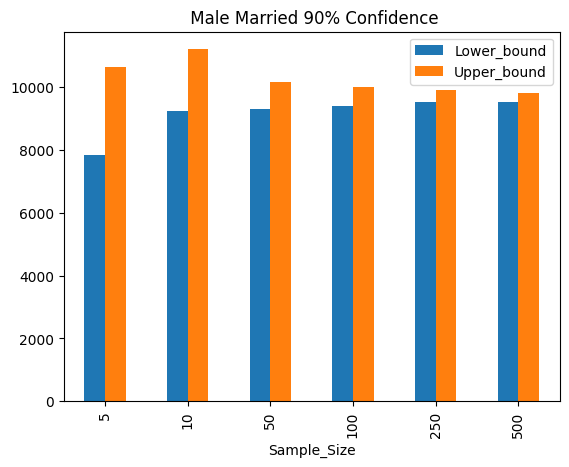

In [ ]:

dum[dum['Confidence_percent'] == 90.0].plot(x='Sample_Size',y = ['Lower_bound','Upper_bound'],kind= 'bar')
plt.title(' Male Married 90% Confidence')



##95 % Confidence Interval

Text(0.5, 1.0, ' Male Married 95% Confidence')

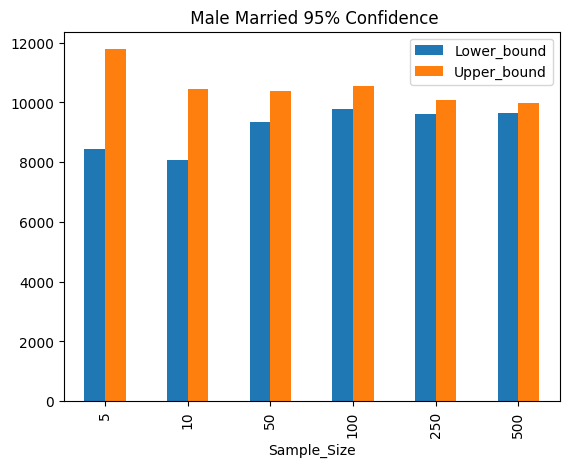

In [ ]:
dum[dum['Confidence_percent'] == 95.0].plot(x='Sample_Size',y = ['Lower_bound','Upper_bound'],kind= 'bar')
plt.title(' Male Married 95% Confidence')

##99% Confidence Interval

Text(0.5, 1.0, ' Male Married 99% Confidence')

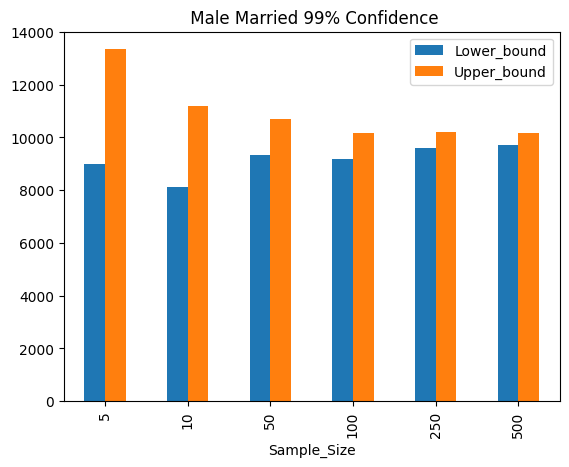

In [ ]:
dum[dum['Confidence_percent'] == 99.0].plot(x='Sample_Size',y = ['Lower_bound','Upper_bound'],kind= 'bar')
plt.title(' Male Married 99% Confidence')

#Female Married

considering 1 - married ||  0  - unmarried in Marital_status

In [ ]:
Female_m = data_f.loc[data_f['Marital_Status'] == 1]
Female_m_t = Female_m.groupby('User_ID')[['User_ID','Purchase']].agg({'Purchase':'mean'}).reset_index()
Female_m_t


,User_ID,Purchase
0,1000010,9728.744395
1,1000016,6840.454545
2,1000024,9362.324675
3,1000028,9062.456140
4,1000032,9543.708333
...,...,...
714,1006001,10477.741667
715,1006005,7398.300000
716,1006029,9260.941176
717,1006036,8007.894942


Text(0.5, 1.0, 'Number of Married Female Vs purchases')

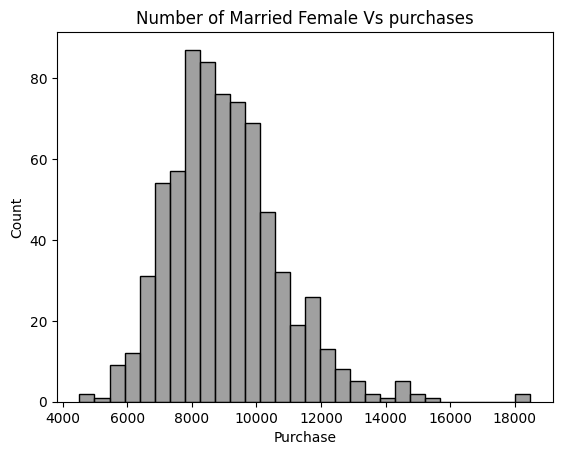

In [ ]:
sns.histplot(x=Female_m_t['Purchase'],data=Female_m_t,color ='Gray')
plt.title('Number of Married Female Vs purchases')

# Now changing the sample size and % confidence to understand the confidence interval where the population means of Married Female purchase amount lies

considering sample size and confidence percentage:  

sample_list = [5,10,50,100,250,500]

confidence_list =[0.9,0.95,0.99]

In [ ]:
def ci(sample_size,confidence_interval):
  data_n_fm = np.mean(Female_m_t['Purchase'].sample(sample_size))
  range_fm = norm.interval(confidence=confidence_interval, loc= data_n_fm, scale = (Female_m_t['Purchase'].std()/np.sqrt(sample_size)))
  return range_fm
##Lets assume sample size from list
sample_list = [5,10,50,100,250,500]
confidence_list =[0.9,0.95,0.99]

result = list()
for i in confidence_list:
  for j in sample_list:
    lower_bound,upper_bound = ci(j,i)
    result.append([lower_bound,upper_bound,i*100,j])
dfm = pd.DataFrame(result)
dfm.columns = ['Lower_bound','Upper_bound','Confidence_percent','Sample_Size']
dfm

,Lower_bound,Upper_bound,Confidence_percent,Sample_Size
0,7201.312647,9799.496363,90.0,5
1,7806.937446,9644.130771,90.0,10
2,8790.995436,9612.613268,90.0,50
3,8800.114102,9381.085643,90.0,100
4,8923.036597,9290.475262,90.0,250
5,8968.765484,9228.583856,90.0,500
6,7817.852000,10913.778851,95.0,5
7,7470.304896,9659.455766,95.0,10
8,8647.925051,9626.943082,95.0,50
9,8490.278750,9182.549040,95.0,100


In [ ]:
dfm['Interval_length'] = dfm['Upper_bound'] -dfm['Lower_bound']
dfm


,Lower_bound,Upper_bound,Confidence_percent,Sample_Size,Interval_length
0,7201.312647,9799.496363,90.0,5,2598.183716
1,7806.937446,9644.130771,90.0,10,1837.193325
2,8790.995436,9612.613268,90.0,50,821.617832
3,8800.114102,9381.085643,90.0,100,580.971541
4,8923.036597,9290.475262,90.0,250,367.438665
5,8968.765484,9228.583856,90.0,500,259.818372
6,7817.852000,10913.778851,95.0,5,3095.926851
7,7470.304896,9659.455766,95.0,10,2189.150870
8,8647.925051,9626.943082,95.0,50,979.018032
9,8490.278750,9182.549040,95.0,100,692.270289


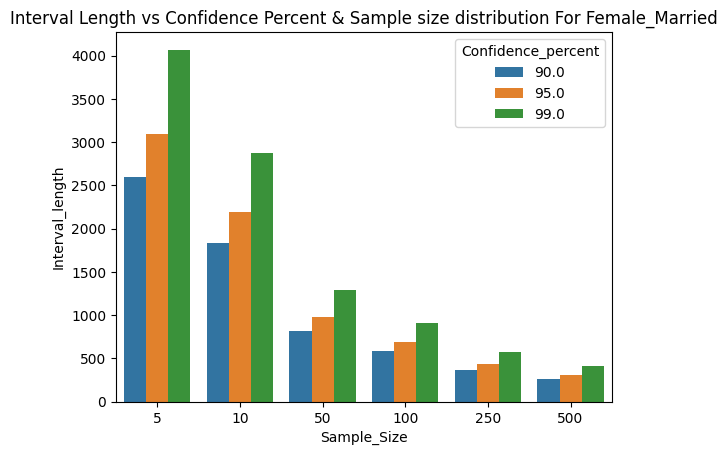

In [ ]:
sns.barplot(x='Sample_Size',y='Interval_length',data=dfm,hue='Confidence_percent')
plt.title("Interval Length vs Confidence Percent & Sample size distribution For Female_Married")
plt.show()

We get the similar trait as usual for female Married

#90%,95%,99% Confidence Percent {Female Married}


Text(0.5, 1.0, ' Female Married 95% Confidence')

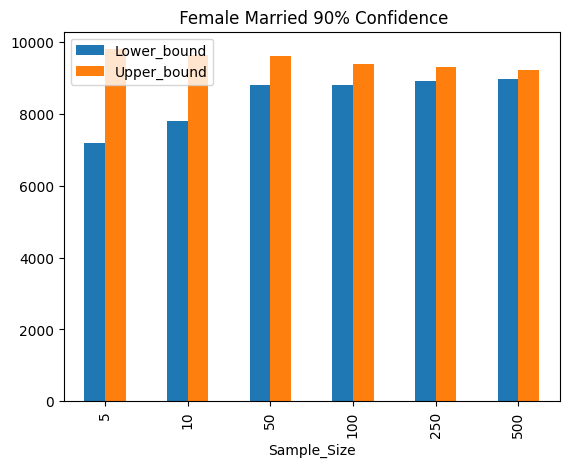

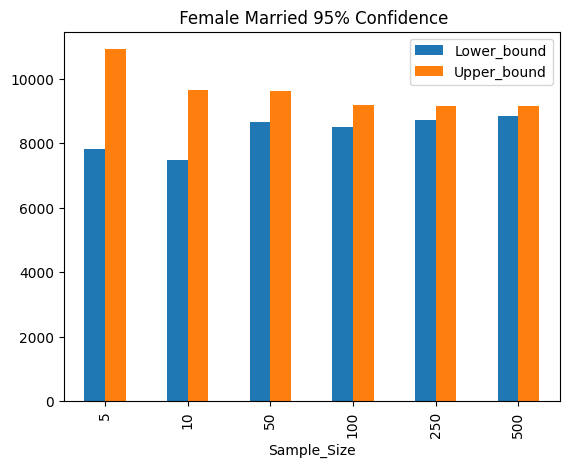

In [ ]:
dfm[dfm['Confidence_percent'] == 90.0].plot(x='Sample_Size',y = ['Lower_bound','Upper_bound'],kind= 'bar')
plt.title(' Female Married 90% Confidence')
dfm[dfm['Confidence_percent'] == 95.0].plot(x='Sample_Size',y = ['Lower_bound','Upper_bound'],kind= 'bar')
plt.title(' Female Married 95% Confidence')


Text(0.5, 1.0, ' Female Married 99% Confidence')

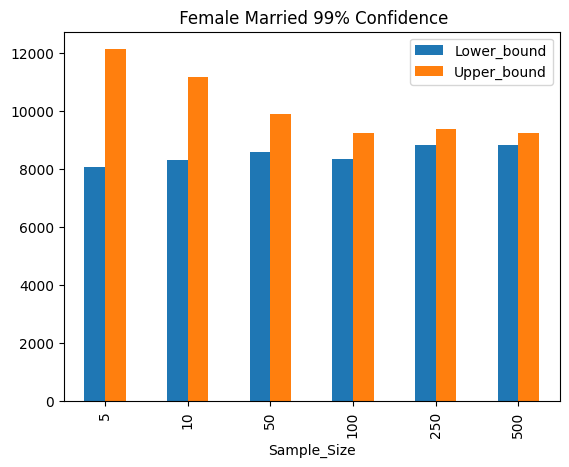

In [ ]:
dfm[dfm['Confidence_percent'] == 99.0].plot(x='Sample_Size',y = ['Lower_bound','Upper_bound'],kind= 'bar')
plt.title(' Female Married 99% Confidence')

#AGE  

In [ ]:
A = data.groupby(['User_ID','Age'])[['Age','Purchase']].aggregate({'Purchase':'mean'}).reset_index()
A

,User_ID,Age,Purchase
0,1000001,0-17,9545.514286
1,1000002,55+,10525.610390
2,1000003,26-35,11780.517241
3,1000004,46-50,14747.714286
4,1000005,26-35,7745.292453
...,...,...,...
5886,1006036,26-35,8007.894942
5887,1006037,46-50,9176.540984
5888,1006038,55+,7502.833333
5889,1006039,46-50,7977.283784


<Axes: xlabel='Age', ylabel='Count'>

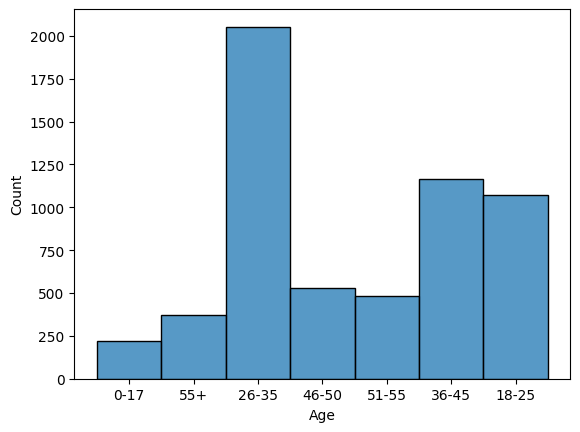

In [ ]:
sns.histplot(data = A, x= A['Age'])

**Insights:**

From the above graph we can understand that 26-35 age are highest in number and like wise 0-17 are the lowest one : since the data is limited so we can check mean value for 0-17 and 26-35 age range purchase amount

In [ ]:
A['Age'] = A['Age'].str.split("-")
A1 = A.explode('Age')
A1['Age'] = A1['Age'].str[:2].apply(lambda x: int(x))
A1


,User_ID,Age,Purchase
0,1000001,0,9545.514286
0,1000001,17,9545.514286
1,1000002,55,10525.610390
2,1000003,26,11780.517241
2,1000003,35,11780.517241
...,...,...,...
5888,1006038,55,7502.833333
5889,1006039,46,7977.283784
5889,1006039,50,7977.283784
5890,1006040,26,9184.994444


**Insights:**

Maximum purchase is done from people of around 26-35 year of age

SO we can check age by bins an thier mean purchase check using confidence interval for better understanding

In [ ]:
A1['Age'].unique()

array([ 0, 17, 55, 26, 35, 46, 50, 51, 36, 45, 18, 25])

#Taking Age: 0-17

In [ ]:
A1_b = A1[(A1['Age'] == 0) | (A1['Age'] == 17)]
A1_b

,User_ID,Age,Purchase
0,1000001,0,9545.514286
0,1000001,17,9545.514286
18,1000019,0,10055.648276
18,1000019,17,10055.648276
48,1000051,0,8030.880000
...,...,...,...
5823,1005973,17,13523.750000
5839,1005989,0,9323.900000
5839,1005989,17,9323.900000
5856,1006006,0,7462.594203


Text(0.5, 1.0, 'Age:[0-17] Vs purchases')

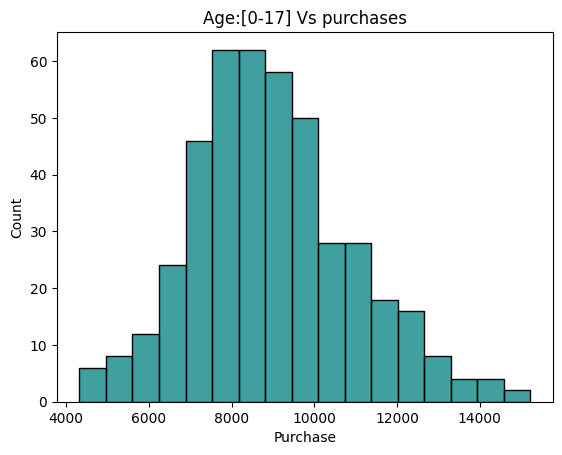

In [ ]:
sns.histplot(x=A1_b['Purchase'],data=A1_b,color ='Teal')
plt.title('Age:[0-17] Vs purchases')

Inference:  From above graph the dataset is not large enough to analyse the mean value from sampling and Central limit theoram , we can predict the mean value by mere inference and using mean value


## Taking Age : 26 - 35 { taking this age range as they are highest in number of purchaser}

In [ ]:
A1_a = A1[(A1['Age'] == 26) | (A1['Age'] == 35)]
A1_a

,User_ID,Age,Purchase
2,1000003,26,11780.517241
2,1000003,35,11780.517241
4,1000005,26,7745.292453
4,1000005,35,7745.292453
7,1000008,26,10345.363636
...,...,...,...
5885,1006035,35,6293.717105
5886,1006036,26,8007.894942
5886,1006036,35,8007.894942
5890,1006040,26,9184.994444


Text(0.5, 1.0, 'Age:[26-35] Vs purchases')

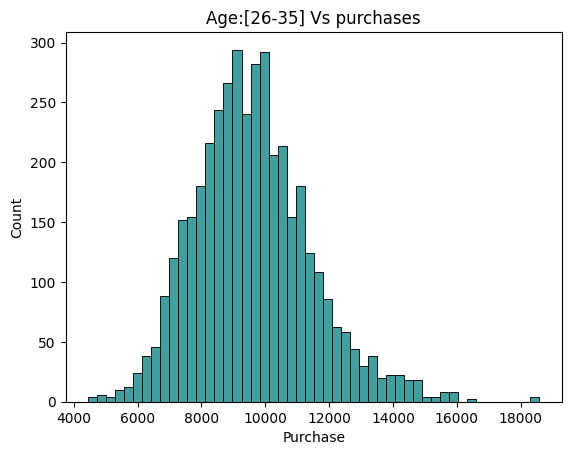

In [ ]:
sns.histplot(x=A1_a['Purchase'],data=A1_a,color ='Teal')
plt.title('Age:[26-35] Vs purchases')

In [ ]:
def ci(sample_size,confidence_interval):
  data_A1_a = np.mean(A1_a['Purchase'].sample(sample_size))
  range_A1_a = norm.interval(confidence=confidence_interval, loc= data_A1_a, scale = (A1_a['Purchase'].std()/np.sqrt(sample_size)))
  return range_A1_a
##Lets assume sample size from list
sample_list = [5,10,50,100,250]
confidence_list =[0.9,0.95,0.99]

result = list()
for i in confidence_list:
  for j in sample_list:
    lower_bound,upper_bound = ci(j,i)
    result.append([lower_bound,upper_bound,i*100,j])
dA1_a = pd.DataFrame(result)
dA1_a.columns = ['Lower_bound','Upper_bound','Confidence_percent','Sample_Size']
dA1_a

,Lower_bound,Upper_bound,Confidence_percent,Sample_Size
0,7692.844486,10376.805232,90.0,5
1,8785.240418,10683.087262,90.0,10
2,9162.520343,10011.263254,90.0,50
3,9300.146264,9900.298132,90.0,100
4,9347.208203,9726.777572,90.0,250
5,7302.895448,10501.031934,95.0,5
6,8637.464127,10898.888124,95.0,10
7,9249.393110,10260.732667,95.0,50
8,9338.928003,10054.053062,95.0,100
9,9410.115162,9862.399961,95.0,250


In [ ]:
dA1_a['Interval_length'] = dA1_a['Upper_bound'] -dA1_a['Lower_bound']
dA1_a

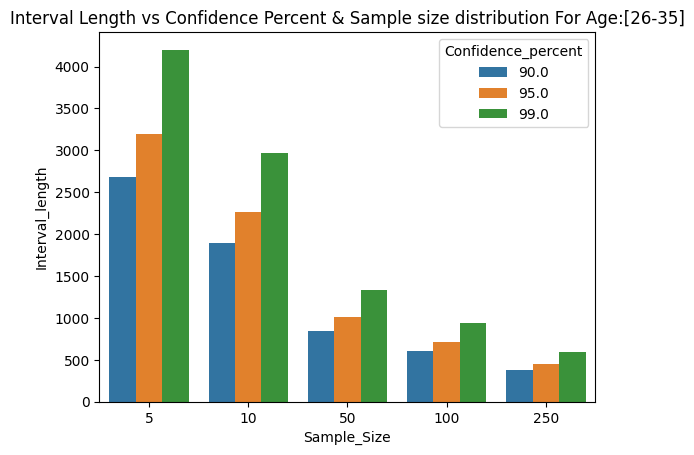

In [ ]:
sns.barplot(x='Sample_Size',y='Interval_length',data=dA1_a,hue='Confidence_percent')
plt.title("Interval Length vs Confidence Percent & Sample size distribution For Age:[26-35]")
plt.show()

**Inference:** For less sample there is more interval length were mean purchase for that age range[26-35] will lie and as we increase the sample size uptill 250 we can predict the mean purchase with more precision

#Insights and Recommedation

**Insights**

1.the features of data given are not correlated enough so all data needs to be treated independently and needs to be look upon individually for fetching insights
2. shows majority of transaction amount lies between 8000 -12000  and the calculated mean is 9806.865
3.majority of transaction amount For female lies between 7000 -10000  and the calculated mean is 8965.19
4.Women spends less than man {inferenced from hypothesis ttest}
5.Male purchase confidence interval overlaps with female
6.From the above graph we can understand that 26-35 age are highest in number and like wise 0-17 are the lowest one
7. for 100 sample checking and 95 % confidence level the mean of purchse for age [26-35] lies in interval (9338.928003	10054.053062)

 { i took because 95% is considered standard and 100 sample is decent choice for predicting interval where population  mean value will lies}

**Recommendation:**

1. on Black friday women spend less than men so womens should be given incentives on that particular day through offers etc.
2. 26-35 year of age persons need to be adressed in particular as they are the most buyers among all age group the marketing startegy and products availability should be around these age group interest so that these people get retained . further theother age group should also be take care off by provisng them incentives or
3.smoother amount transaction systems need to be provided to females as the mean purchase amount range lies in 7000- 10000 , such big amount could be made possible through credit card or debit cards transaction furthermore walmart should provide the financial transactions incentives through cashbacks and offers or prize for these purchase range 7000 - 10000 female it also applies for males within thr transaction 0f 8000-12000 buying we can categories these users attract them for more high purchase so as firm could earn more profit

4. as women spends less than men so womens good items need to be updated for more choices of purchase so that women could buy more
